<a href="https://colab.research.google.com/github/dilia-w/Visao-Computacional/blob/main/05_Calculo_da_transformada_de_Fourier_usando_uma_fun%C3%A7%C3%A3o_que_aumenta_a_resolu%C3%A7%C3%A3o_dela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

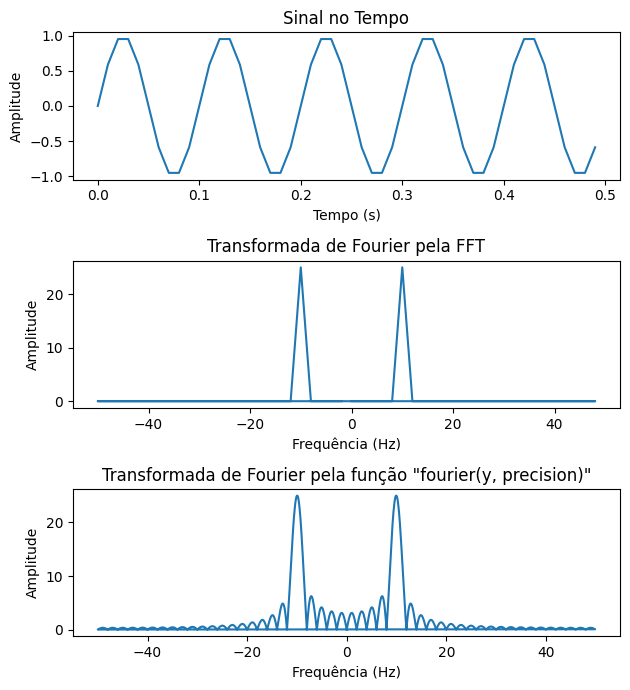

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift

# Parâmetros do sinal
amplitude = 1.0  # Amplitude do sinal
frequencia = 10  # Frequência do sinal em Hz
tempo_total = .5  # Duração total do sinal em segundos
amostragem = 100  # Taxa de amostragem em Hz
vetor_zeros = np.zeros(1000)

########################################################
# Função que permite calcular a transformada de Fourier informando a precisão
def fourier(y, precision):
    N = len(y)
    Y = []
    for k in range(N * precision):
        sum = 0j
        for n in range(N):
            angle = 2j * np.pi * n * k / precision / N
            sum += y[n] * np.exp(-angle)
        Y.append(sum)
    X = []
    for n in range(N * precision):
        X.append(n / tempo_total / precision)

    return Y, X
########################################################

# Gerar vetor de tempo
tempo = np.linspace(0, tempo_total, int(tempo_total * amostragem), endpoint=False)

# Gerar sinal senoidal
sinal = amplitude * np.sin(2 * np.pi * frequencia * tempo)

# Calcular a transformada de Fourier do sinal pela biblioteca de FFT
transformada1 = fft(sinal)
frequencias1 = fftfreq(len(sinal), 1 / amostragem)

# Calcular a transformada de Fourier do sinal pela função fourier(y, precision)
transformada2, frequencias2 = fourier(sinal, 20)
frequencias2 = fftshift(frequencias2)

# Plotar o sinal no tempo
plt.figure(figsize=(6.4, 7))

plt.subplot(3, 1, 1)
plt.plot(tempo, sinal)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Sinal no Tempo')

# Plotar a transformada de Fourier pela FFT
plt.subplot(3, 1, 2)
plt.plot(frequencias1, np.abs(transformada1))
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.title('Transformada de Fourier pela FFT')

# Plotar a transformada de Fourier pela função "fourier(y, precision)"
plt.subplot(3, 1, 3)
plt.plot(frequencias2 - 50, np.abs(transformada2))
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.title('Transformada de Fourier pela função "fourier(y, precision)"')

# Exibir os gráficos
plt.tight_layout()
plt.show()
